## Repeated measures ANOVA with control group

### 1. Introduction
Last week we covered various types of ANOVA along with the study designs and data to which they apply. Given that our data frame contains information from individuals who participated in both measurement time points (pre and post) but in separate groups, a repeated measures ANOVA with a control group can be used. Note that this is a mixed ANOVA because there are within- and between-person variables. Can you tell which is which?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pingouin as pg

### 2. Visualizing the data
Use the `seaborn` function or any other package to create boxplots of the depression scores in the control and experimental groups at pre- and post-intervention. Your plot should convey the same information as the one shown below: 

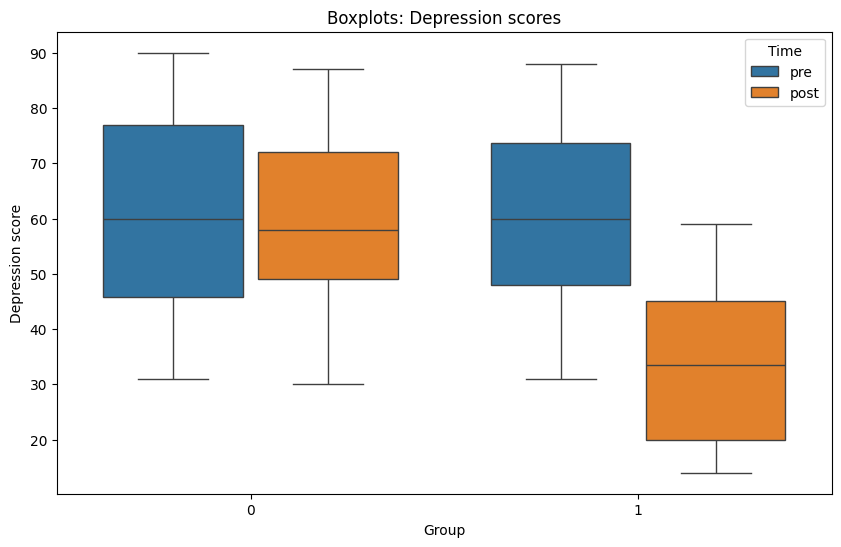

In [9]:
# Read the CSV file using a relative path
dep_long = pd.read_csv("../MLM_and_CSM/Datasets/dep_long.csv")

# Convert specific columns to categorical data types
dep_long['id'] = dep_long['id'].astype('category')
dep_long['group'] = dep_long['group'].astype('category')
dep_long['time'] = dep_long['time'].astype('category')

# Reorder the levels of the 'time' factor
dep_long['time'] = dep_long['time'].cat.reorder_categories(['pre', 'post'])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='score', hue='time', data=dep_long, gap = 0.1)
plt.xlabel("Group")
plt.ylabel("Depression score")
plt.title("Boxplots: Depression scores")
plt.legend(title='Time')
plt.show()

### 2. Computation
In this session, we will utilize the `mixed_anova()` function from the `pingouin` library to perform a mixed-design ANOVA. This function provides a streamlined way to analyze data with both between-subject and within-subject factors.

The `mixed_anova()` function takes several key arguments:

* `data`: The pandas DataFrame containing your data in long format.
* `dv`: The name of the dependent variable column.
* `within`: The name of the within-subject factor column.
* `between`: The name of the between-subject factor column.
* `subject`: The name of the subject ID column.

This function efficiently handles the analysis of repeated measures data, including sphericity corrections, making it a robust alternative to other ANOVA implementations in Python.

Run the provided Python code using `pingouin.mixed_anova()` and interpret the resulting ANOVA table in relation to the previously visualized boxplots. The table will provide F-statistics, p-values, and effect sizes, allowing you to assess the significance of the main effects and interactions of your within- and between-subject factors.

In [5]:
# Create new columns for contrasts
dep_long['group_contrast'] = dep_long['group'].cat.codes.replace({0: -1, 1: 1})
dep_long['time_contrast'] = dep_long['time'].cat.codes.replace({0: -1, 1: 1})

# Perform ANOVA
aov = pg.mixed_anova(data=dep_long, dv='score', within='time', between='group', subject='id')

# Print the ANOVA table
print(aov)

        Source         SS  DF1  DF2         MS          F         p-unc  \
0        group   9370.805    1   98   9370.805  36.298482  2.970761e-08   
1         time  10067.805    1   98  10067.805  40.910611  5.455773e-09   
2  Interaction   7675.605    1   98   7675.605  31.189886  2.094010e-07   

        np2  eps  
0  0.270282  NaN  
1  0.294510  1.0  
2  0.241427  NaN  
